# Predicting MPG

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
header = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
df = pd.read_csv("data/auto-mpg.data", delimiter=",", header=None)
df.columns = header
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
target = ["mpg"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 27.6+ KB


We don't have missing values (I deleted 6 rows with a missing value manually from the dataset)

## Exploratory Analysis

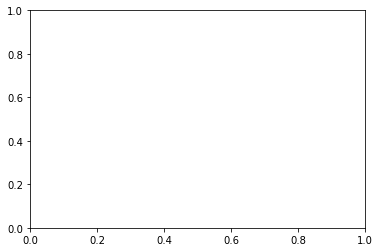

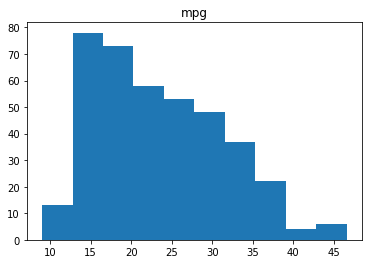

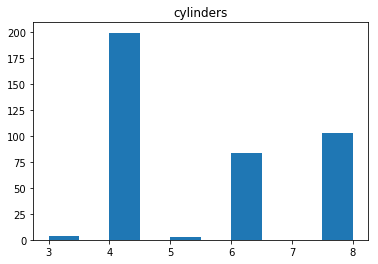

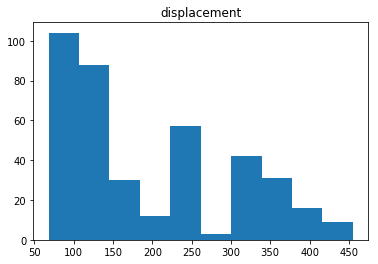

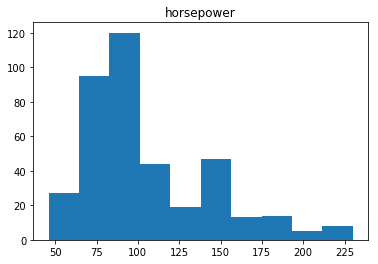

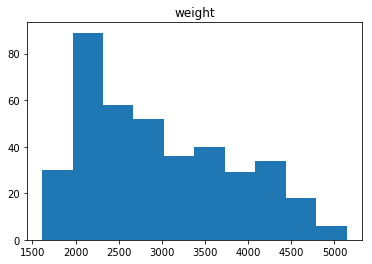

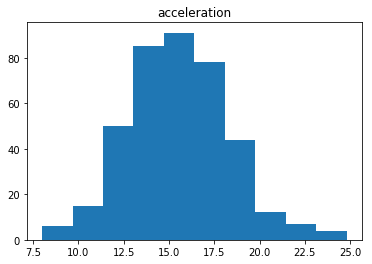

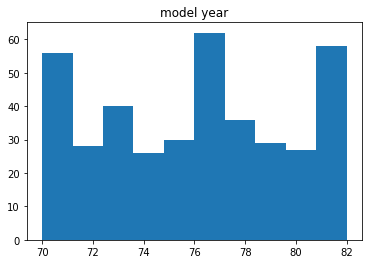

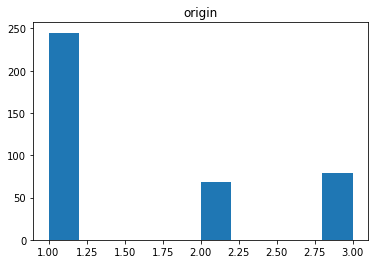

In [71]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number): #only plot numerical dtypes
        fig, ax = plt.subplots()
        ax.hist(df[col])
        ax.set_title(col)
        plt.show()

We note we have 3 categorical fields, namely: cylinders, model-year and origin. Origin relates to which contintent the car is from (1 = USA/Americas, 2 = Germany/Eur, 3 = Japan/Asia)

Let's also remove the car name column for now, so we can get dirty with the numerical fields. 

In [12]:
car_names = df['car name']
df_numerical = df.drop('car name', axis=1)

In [13]:
df_numerical.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


For further visualisation we shall scale the numerical values. This helps in visualising them 

In [14]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df_numerical['mpg'] = min_max_scaler.fit_transform(df_numerical[['mpg']])
df_numerical['displacement'] = min_max_scaler.fit_transform(df_numerical[['displacement']])
df_numerical['horsepower'] = min_max_scaler.fit_transform(df_numerical[['horsepower']])
df_numerical['weight'] = min_max_scaler.fit_transform(df_numerical[['weight']])
df_numerical['acceleration'] = min_max_scaler.fit_transform(df_numerical[['acceleration']])

df_numerical.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


Now, we have normalized the continous fields. Let's also replace the integers in origin. 

In [15]:
df_numerical['Country_code'] = df_numerical.origin.replace([1,2,3], ["USA", "Europe", "Japan"])
df['Country_code'] = df.origin.replace([1,2,3], ["USA", "Europe", "Japan"])

Let's explore how MPG relates to these categories

### MPG Distribution per continent

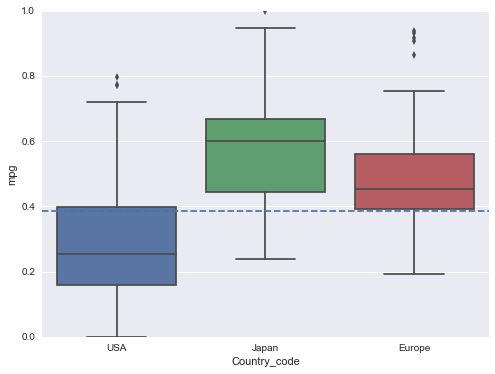

In [119]:
fig, ax = plt.subplots(figsize=(8, 6))
data = df_numerical[['Country_code', 'mpg']]
fig = sns.boxplot(x='Country_code', y='mpg', data=data)
fig.axis(ymin=0, ymax=1)
plt.axhline(data['mpg'].mean(), linestyle='dashed')
plt.show()

The dashed blue line represents the overall mean of the mpg in the dataset.

We note that the majority of the USA cars are below this global average. And that the majority of the cars from the other two continents are above average.

### MPG distribution per year

Let's explore this for the model year and see if that matters.

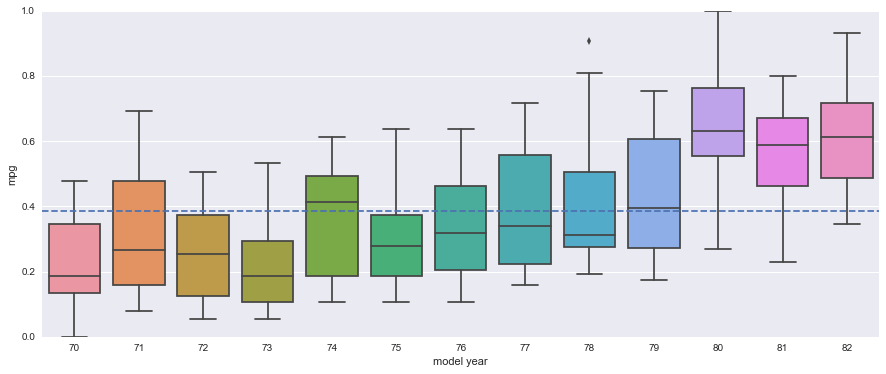

In [120]:
fig, ax = plt.subplots(figsize=(15, 6))
data = df_numerical[['model year', 'mpg']]
fig = sns.boxplot(x='model year', y='mpg', data=data)
fig.axis(ymin=0, ymax=1)
plt.axhline(data['mpg'].mean(), linestyle='dashed')
plt.show()

From this plot we can derive that over time cars tend to become more fuel efficient on average.

### MPG distribution per cylinder

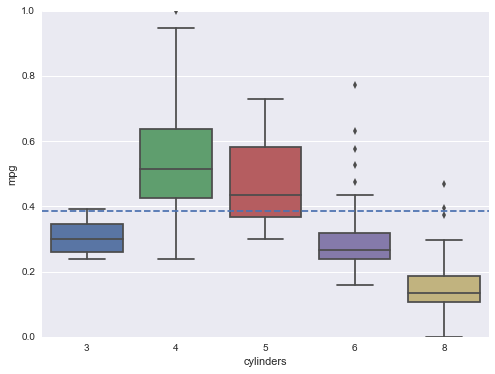

In [123]:
fig, ax = plt.subplots(figsize=(8, 6))
data = df_numerical[['cylinders', 'mpg']]
fig = sns.boxplot(x='cylinders', y='mpg', data=data)
fig.axis(ymin=0, ymax=1)
plt.axhline(data['mpg'].mean(), linestyle='dashed')
plt.show()

It seems that 4-5 cylniders increse the mpg and fewer or more cylinders decrease the mpg on average. 

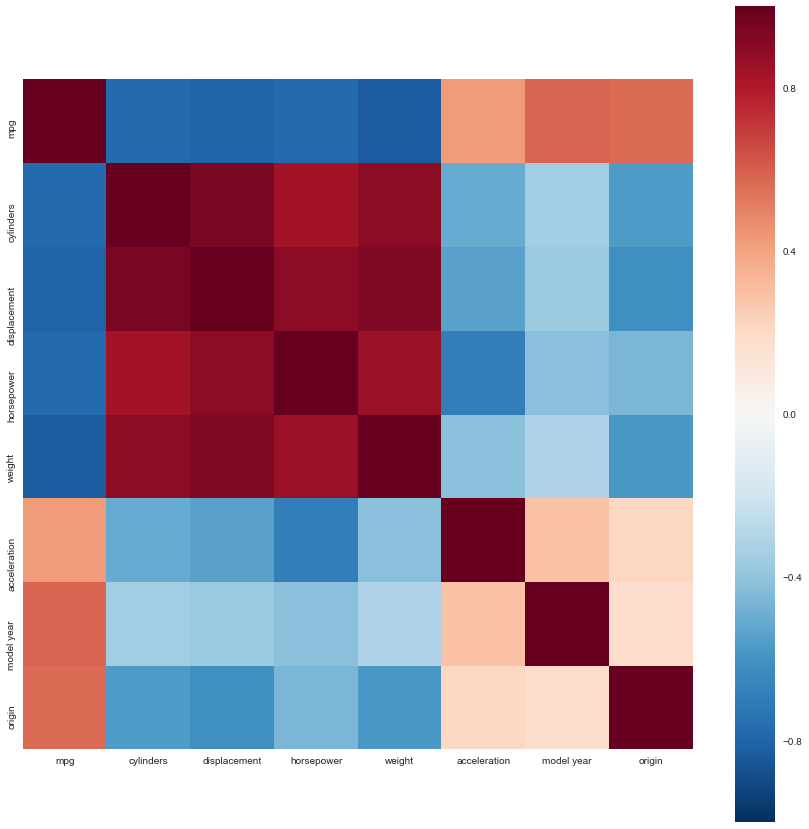

In [130]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlation_matrix, square=True)
plt.show()

The fields with the highest positive correlation with mpg seem to be origin and model year. The fields with the highest negative correlation seem to be cylinders, displacement, horsepower and weight. 

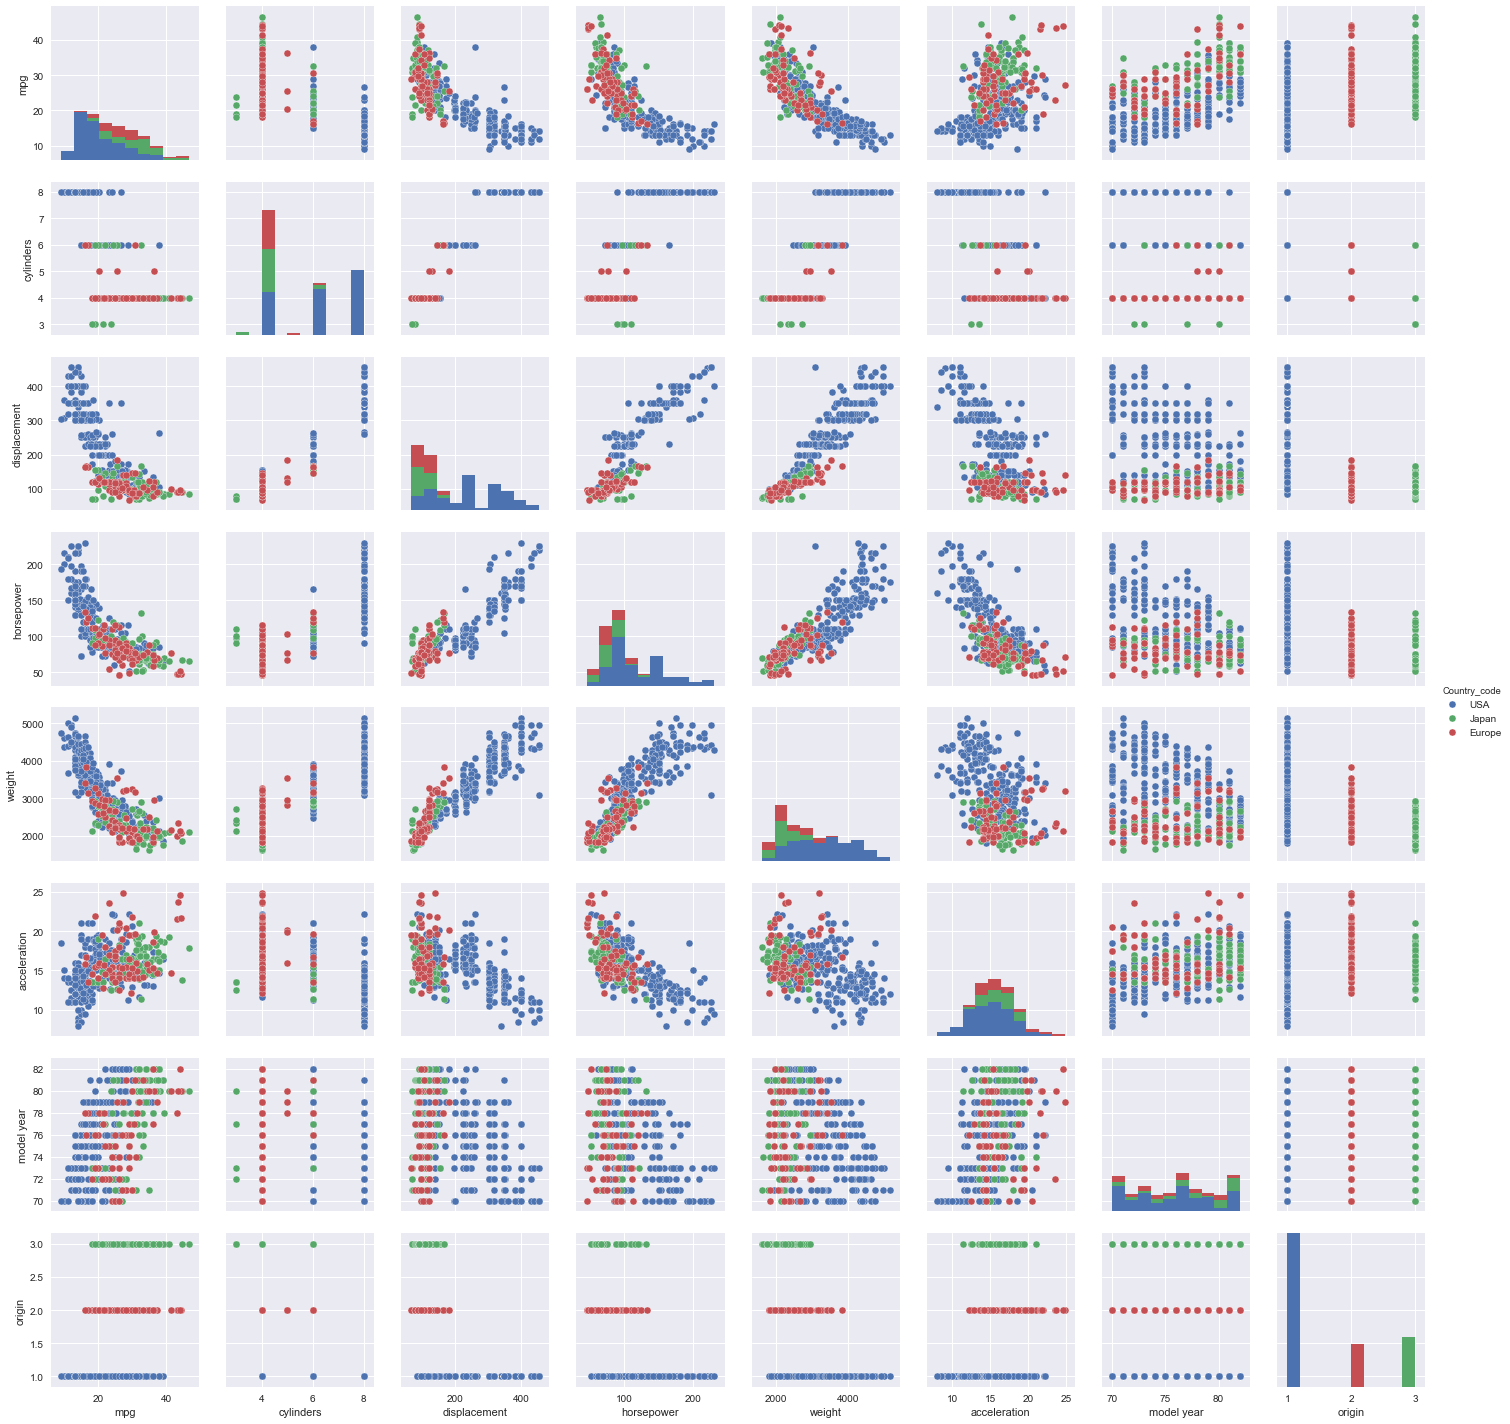

In [132]:
sns.set()
sns.pairplot(df, hue='Country_code')
plt.show()

In this plot we quickly note that that are fewer cars from Europe and Japan in our dataset. It seems like that USA cars are in general heavier. The dataset seems to have more USA cars with a a larger horsepower. The acceleration in general seems to be lower than the cars from the other two continentts 

In our dataset we have one column we have ommited so far, the car name field. 

## Generate extra information

In [136]:
df['car name'].head(15)

0     chevrolet chevelle malibu
1             buick skylark 320
2            plymouth satellite
3                 amc rebel sst
4                   ford torino
5              ford galaxie 500
6              chevrolet impala
7             plymouth fury iii
8              pontiac catalina
9            amc ambassador dpl
10          dodge challenger se
11           plymouth 'cuda 340
12        chevrolet monte carlo
13      buick estate wagon (sw)
14        toyota corona mark ii
Name: car name, dtype: object

It seems that this field follows the format brand - type - variant. This makes extracting the brand easy. 

In [16]:
df['car name'] = df.apply(lambda x: x['car name'].split()[0], axis=1)
df_numerical['car_name'] = df['car name']

Let's see how brand name relates to mpg

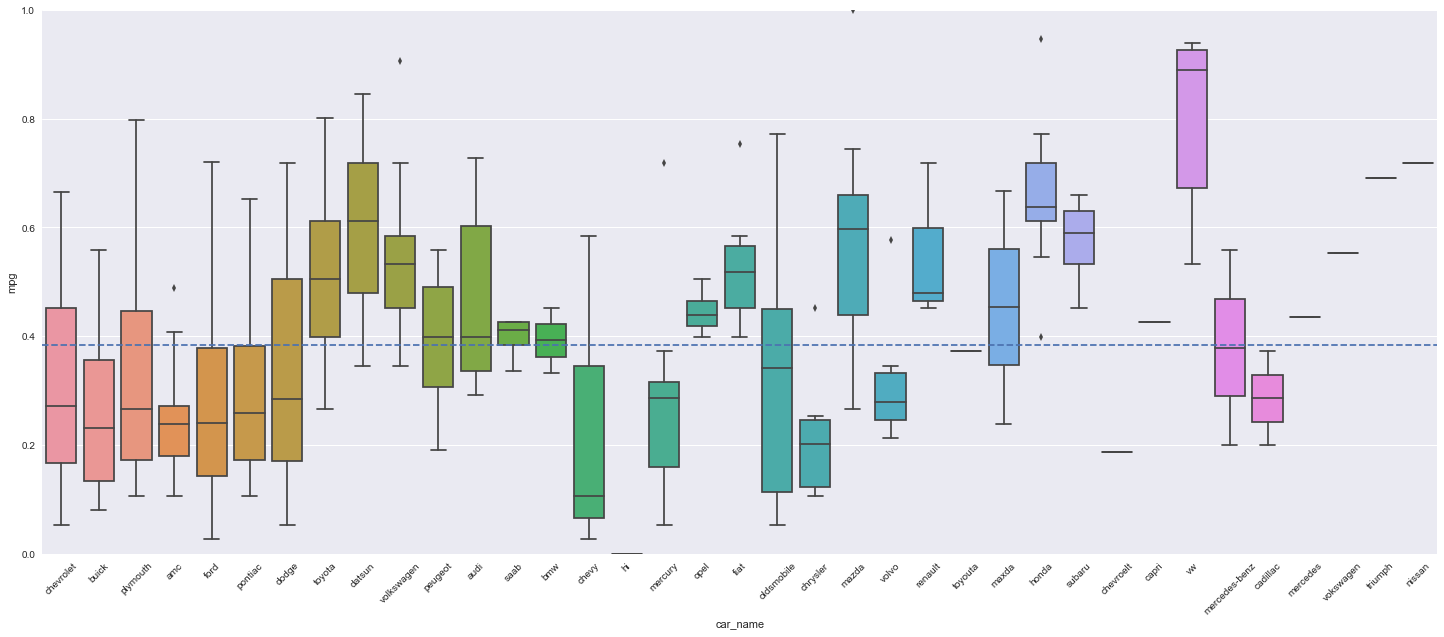

In [166]:
fig, ax = plt.subplots(figsize=(25, 10))
data = df_numerical[['car_name', 'mpg']]
fig = sns.boxplot(x='car_name', y='mpg', data=data)
fig.axis(ymin=0, ymax=1)
fig.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.axhline(data['mpg'].mean(), linestyle='dashed')
plt.show()

Seems like we need to clean up the data a little here. (Mercedes, Mercedes-benz, vw, volkswagen)

We see that there is vast amount of difference inbetween mileage and brand name. (VW cars are for example much more fuel efficient than mercedes-benz). The most fuel efficient car seems to be a mazda and the least fuel efficient one seems to be a 'hi'

Let's if the data shows reasonable correlations. 

In [181]:
def plot_regplot(x_var, y_var, df):
    data = df[[x_var, y_var]]
    sns.regplot(data[x_var], data[y_var])
    plt.show()

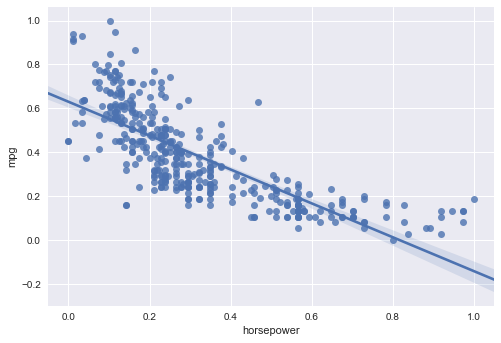

In [182]:
plot_regplot('horsepower', 'mpg', df_numerical)

As expected a higher horsepower means a lower mileage

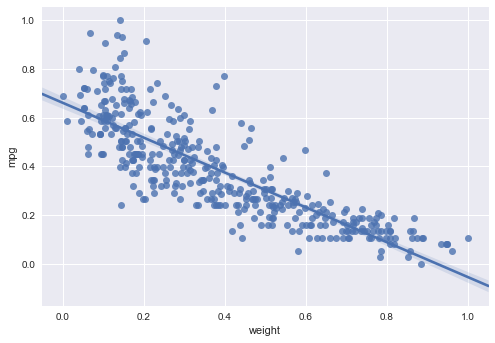

In [184]:
plot_regplot('weight', 'mpg', df_numerical)

The same can be said about the weight of the car. The heavier a car the less fuel efficient it is.

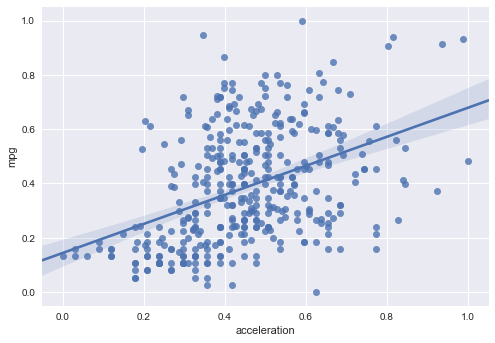

In [185]:
plot_regplot('acceleration', 'mpg', df_numerical)

The larger the capacity of the car to accelerate quickly the more fuel-efficient it seems to become. This seems counterintuitive, as typically cars that can accelerate quickly have large engines and therefore consume more fuel. Unfortunately, I have not found the unit corresponding to the values for this column. If this value denotes time needed to reach a speed of 100 km/h instead of m/s^2 it does make sense the higher the value the more the car is fuel efficient

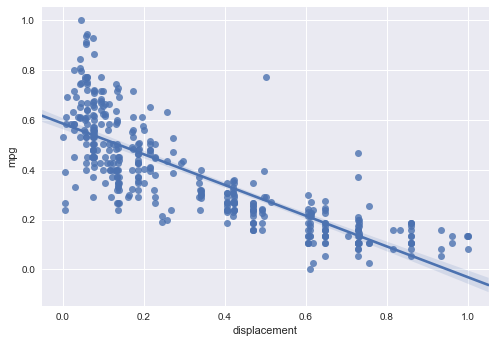

In [188]:
plot_regplot('displacement', 'mpg', df_numerical)

A higher displacement is also negatively correlated with lower mileage

Now we have explored the data let's try to see if we can predict mileage

## Predicting mileage  -> Feature Engineering

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Country_code
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford,USA


In [192]:
# df_numerical = df_numerical.drop('origin', axis=1)

First let's split our dataset into a train and test set. I will use 75% of my dataset as a training set and the remaining to test the performance of my model. To prevent leakage we will use the original dataset

In [18]:
features = [
'acceleration',
 'cylinders',
 'model year',
 'horsepower',
 'weight',
 'displacement',
 'Country_code',
 'car name']

In [19]:
X = df[features]
y = df[target]

There is ordering in the dataset, notice how the model year for test starts with the '79 whereas for the train set it starts with the '70s. Let's shuffle the dataset and create new train and test sets. 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =40)

In [21]:
X_train.head()

,acceleration,cylinders,model year,horsepower,weight,displacement,Country_code,car name
146,14.0,4,74,75.0,2246.0,116.0,Europe,fiat
244,19.4,4,78,52.0,1985.0,78.0,Japan,mazda
227,11.1,8,77,180.0,4220.0,400.0,USA,pontiac
284,13.4,8,79,129.0,3725.0,302.0,USA,ford
198,21.0,6,76,78.0,3574.0,250.0,USA,ford


In both our datasets we have a few categorical features (cylinders, model year, country_code and car_name) and a few numerical values (mpg, displacement, horsepower, weight, acceleration).

First we need to do something with the categorical features. Some options for handling categorical features are 
 - string indexing
 - one hot encoding
 - feature hashing
 - weight of evidence
 
Let's expore these options. 

#### String indexing
String indexing is mapping categorical values to an ordinal number, e.g. NYC to 1, Miami to 2, etc. The order will be selected randomly. A pro for this approach is that it is simple to implement. That being said, most often this approach does not make much sense as our algorithm will assume that in this example Miami is more similar to NYC and will differ in that regard from some other city down the number line. 

#### One hot enoding
One hot encoding is the act of encoding each category as a vector. With for example 4 categories [NYC, Miami, London, Tokyo] this approach will create a vector and encode the mathcing field with a 1, e.g. [0,1,0,0] for Miami.
OHE is a popupar approach for categorical columns but it has a couple downsides: It will add one additional column per category to your dataset and previously unseen categories cannot be mapped to a column. The latter can be a curse with datasets that frequently see new values. An option to handle this would be to add such values to an unkown column.  The former can be problematic when there are too many categories in relation to the size of the dataset. Many columns will make the ML model slower.  

#### Feature hashing
Feature hashing is a technique of encoding a set of categories to a vector of predefined length using hashing. A category is first converted into a hash number using a hashing function and this hash number is then mapped in the vector. In the case of a lot of categories or sparse matrices this allows for a smaller matrix without throwing away too much information. It also accounts for previously unknown categories because all new unseen values need to be hashed first. 


In [22]:
numerical_features = ['acceleration',
 'horsepower',
 'weight',
 'displacement']

categorical_features = [
 'cylinders',
 'Country_code',
 'car name']

date_features = [
    'model year'
]

We can scale the numerical features using min-max scaling (or normalization). The categorical features need more thought. We could employ one-hot encoding, but especially in the case of car names this will yield relatively quite a lot of additional columns. This dataset is already pretty small, so we need to be careful with added columns. For our initial model we will one-hot encode cylinders and country code. We will use feature hashing on car names and because there is an ordinal relationship in years (the year '79 > '76) we will shift these columns by the initial year but keep the ordinality. 

In [23]:
def clean_car_names(row):
        if row['car name'][0:4] == 'chev':
            return 'chevrolet'
        elif row['car name'] == 'maxda':
            return'mazda'
        elif row['car name'][0:3] == 'toy':
            return'toyota'
        elif row['car name'] == 'vw' or row['car name'] == 'vokswagen':
            return 'volkswagen'
        elif row['car name'][0:6] == 'merced':
            return 'mercedes-benz'
        else:
            return row['car name']
        
def scale_year(X):
        X[['model year']] = X[['model year']]-70

So:
 - 1: Scale continous variables
 - 2: Transform categorical features


In [24]:
np.unique(df['car name'])

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
       'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford',
       'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz',
       'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth',
       'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw'], dtype=object)

In [25]:
X_train.head(5)

,acceleration,cylinders,model year,horsepower,weight,displacement,Country_code,car name
146,14.0,4,74,75.0,2246.0,116.0,Europe,fiat
244,19.4,4,78,52.0,1985.0,78.0,Japan,mazda
227,11.1,8,77,180.0,4220.0,400.0,USA,pontiac
284,13.4,8,79,129.0,3725.0,302.0,USA,ford
198,21.0,6,76,78.0,3574.0,250.0,USA,ford


In [28]:
from sklearn.feature_extraction import FeatureHasher
X_train_copy = X_train.copy() 
#I use a copy here because I am gonna throw all data transformations into a transform function
fh = FeatureHasher(n_features=8, input_type="string")
# dv = DictVectorizer()
sp = fh.fit_transform(X_train_copy['car name'])
df_test = pd.DataFrame(sp.toarray(), columns = ['fh1', 'fh2', 'fh3', 'fh4', 'fh5', 'fh6', 'fh7', 'fh8'],
                      index=X_train_copy.index)
# df_test.columns =['fh1', 'fh2', 'fh3', 'fh4', 'fh5', 'fh6', 'fh1', 'fh2']
X_train_copy = pd.concat([X_train_copy,df_test], axis=1)
X_train_copy.drop('car name', axis=1, inplace=True)
X_train_copy.head()

,acceleration,cylinders,model year,horsepower,weight,displacement,Country_code,fh1,fh2,fh3,fh4,fh5,fh6,fh7,fh8
146,14.0,4,74,75.0,2246.0,116.0,Europe,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
244,19.4,4,78,52.0,1985.0,78.0,Japan,0.0,-1.0,2.0,1.0,1.0,0.0,0.0,0.0
227,11.1,8,77,180.0,4220.0,400.0,USA,0.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0,0.0
284,13.4,8,79,129.0,3725.0,302.0,USA,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
198,21.0,6,76,78.0,3574.0,250.0,USA,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0


The FeatureHasher has nicely converted our car names to a vector. If we check our df on index 284 and 198 we see that both cars are a Ford. If we now inspect the hashed value for Ford we see it is [0 1 0 3 0 0 0 0]. 


Now we have done some feature engineering we can train our model. First let's put our pipeline in a function

In [139]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_extraction import FeatureHasher, DictVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =50)
#Pipeline

scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
def transfrom_data_set(df):
    df = df.copy()
    
    df['car name'] = df.apply(lambda x: clean_car_names(x), axis=1)


#     scaler = MinMaxScaler() #Do not use a new one!
    df[numerical_features] = scaler.transform(df[numerical_features])

    ohe_features = ["cylinders", "Country_code"]
    hashing_features = ["car name"]
    df = pd.get_dummies(df, columns=ohe_features)
    
    # Note to self: normally you want to be able to account for unseen values when one-hot encoding. So at minimum an 
    # 'unseen' column is required. The number of values for these categories in this dataset isn't that many, hence
    # I skip it for convenience reasons

    scale_year(df) 
    
    fh = FeatureHasher(n_features=8, input_type="string")
    # dv = DictVectorizer()
    sp = fh.fit_transform(df['car name'])
    df_test = pd.DataFrame(sp.toarray(), columns = ['fh1', 'fh2', 'fh3', 'fh4', 'fh5', 'fh6', 'fh7', 'fh8'],
                          index=df.index)
    # df_test.columns =['fh1', 'fh2', 'fh3', 'fh4', 'fh5', 'fh6', 'fh1', 'fh2']
    df = pd.concat([df, df_test], axis=1)
    df.drop('car name', axis=1, inplace=True)
    return df


X_train_tf = transfrom_data_set(X_train)
X_test_tf = transfrom_data_set(X_test)

In [130]:
X_train_tf.head()

,acceleration,model year,horsepower,weight,displacement,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,Country_code_Japan,Country_code_USA,fh1,fh2,fh3,fh4,fh5,fh6,fh7,fh8
354,0.739130,11,0.189944,0.458463,0.184416,0,1,0,0,0,...,0,0,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,2.0
371,0.565217,12,0.122905,0.101219,0.054545,0,1,0,0,0,...,1,0,0.0,-1.0,2.0,1.0,1.0,0.0,0.0,0.0
103,0.248447,3,0.675978,0.933655,0.857143,0,0,0,0,1,...,0,1,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
48,0.341615,1,0.223464,0.172101,0.135065,0,1,0,0,0,...,0,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
43,0.217391,1,0.720670,1.000000,0.857143,0,0,0,0,1,...,0,1,0.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0,0.0


In [97]:
X_test_tf.head()

,acceleration,model year,horsepower,weight,displacement,cylinders_4,cylinders_6,cylinders_8,Country_code_Europe,Country_code_Japan,Country_code_USA,fh1,fh2,fh3,fh4,fh5,fh6,fh7,fh8
380,0.490683,12,0.357542,0.377658,0.288312,0,1,0,0,0,1,1.0,-1.0,0.0,0.0,0.0,-2.0,0.0,-1.0
34,0.434783,1,0.301676,0.486532,0.467532,0,1,0,0,0,1,0.0,0.0,0.0,-1.0,1.0,-1.0,0.0,2.0
29,0.372671,1,0.234637,0.146583,0.070130,1,0,0,0,1,0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,-1.0
185,0.279503,6,0.525140,0.737737,0.610390,0,0,1,0,0,1,0.0,0.0,0.0,-1.0,1.0,-1.0,0.0,2.0
215,0.391304,7,0.189944,0.153672,0.106494,1,0,0,0,0,1,1.0,-1.0,0.0,0.0,0.0,-2.0,0.0,-1.0


In [146]:
print(X_train_tf.columns)
print(X_test_tf.columns)

Index(['acceleration', 'model year', 'horsepower', 'weight', 'displacement',
       'cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'Country_code_Europe', 'Country_code_Japan',
       'Country_code_USA', 'fh1', 'fh2', 'fh3', 'fh4', 'fh5', 'fh6', 'fh7',
       'fh8'],
      dtype='object')
Index(['acceleration', 'model year', 'horsepower', 'weight', 'displacement',
       'cylinders_4', 'cylinders_6', 'cylinders_8', 'Country_code_Europe',
       'Country_code_Japan', 'Country_code_USA', 'fh1', 'fh2', 'fh3', 'fh4',
       'fh5', 'fh6', 'fh7', 'fh8'],
      dtype='object')


We note that the test set is missing the column cylinders_3 created by the one-hot encoding step. Let's add this to our test set. 

In [147]:
X_train_tf, X_test_tf = X_train_tf.align(X_test_tf, join='outer', axis=1, fill_value=0)

In [131]:
X_train_tf_1, X_test_tf_1 = X_train_tf_1.align(X_test_tf_1, join='outer', axis=1, fill_value=0)

In [148]:
print(X_train_tf.columns)
print(X_test_tf.columns)

Index(['Country_code_Europe', 'Country_code_Japan', 'Country_code_USA',
       'acceleration', 'cylinders_3', 'cylinders_4', 'cylinders_5',
       'cylinders_6', 'cylinders_8', 'displacement', 'fh1', 'fh2', 'fh3',
       'fh4', 'fh5', 'fh6', 'fh7', 'fh8', 'horsepower', 'model year',
       'weight'],
      dtype='object')
Index(['Country_code_Europe', 'Country_code_Japan', 'Country_code_USA',
       'acceleration', 'cylinders_3', 'cylinders_4', 'cylinders_5',
       'cylinders_6', 'cylinders_8', 'displacement', 'fh1', 'fh2', 'fh3',
       'fh4', 'fh5', 'fh6', 'fh7', 'fh8', 'horsepower', 'model year',
       'weight'],
      dtype='object')


Now the columns align!

## Training Model

Let's establish a baseline model first. We can use the mean per car name or per year for this. Previously we have seen that the model year has a more condensed distribution than the car name, so my expectation is that that the model year will establish a better baseline model. But let's try both and rank them against each other.  

In [101]:
df['car name'] = df.apply(lambda x: clean_car_names(x), axis=1)
print(np.unique(df['car name']))

['amc' 'audi' 'bmw' 'buick' 'cadillac' 'capri' 'chevrolet' 'chrysler'
 'datsun' 'dodge' 'fiat' 'ford' 'hi' 'honda' 'mazda' 'mercedes-benz'
 'mercury' 'nissan' 'oldsmobile' 'opel' 'peugeot' 'plymouth' 'pontiac'
 'renault' 'saab' 'subaru' 'toyota' 'triumph' 'volkswagen' 'volvo']


In [102]:
df_shifted_model_year= df.copy() 
scale_year(df_shifted_model_year)
# mean_values_model_year = df_shifted_model_year.loc[X_test.index].groupby('model year').mean()['mpg']
# mean_values_car_name = df.loc[X_test.index].groupby('car name').mean()['mpg']
mean_values_model_year = df_shifted_model_year.groupby('model year').mean()['mpg']
mean_values_car_name = df.groupby('car name').mean()['mpg']

In [103]:
mean_values_model_year

model year
0     17.689655
1     21.111111
2     18.714286
3     17.100000
4     22.769231
5     20.266667
6     21.573529
7     23.375000
8     24.061111
9     25.093103
10    33.803704
11    30.185714
12    32.000000
Name: mpg, dtype: float64

In [104]:
mean_values_car_name

car name
amc              18.070370
audi             26.714286
bmw              23.750000
buick            19.182353
cadillac         19.750000
capri            25.000000
chevrolet        20.219149
chrysler         17.266667
datsun           31.113043
dodge            22.060714
fiat             28.912500
ford             19.475000
hi                9.000000
honda            33.761538
mazda            30.058333
mercedes-benz    23.966667
mercury          19.118182
nissan           36.000000
oldsmobile       21.100000
opel             25.750000
peugeot          23.687500
plymouth         21.703226
pontiac          20.012500
renault          29.666667
saab             23.900000
subaru           30.525000
toyota           28.165385
triumph          35.000000
volkswagen       31.840909
volvo            21.116667
Name: mpg, dtype: float64

In [105]:
X_train_tf.head()

,Country_code_Europe,Country_code_Japan,Country_code_USA,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,displacement,...,fh2,fh3,fh4,fh5,fh6,fh7,fh8,horsepower,model year,weight
354,1,0,0,0.739130,0,1,0,0,0,0.184416,...,0.0,-1.0,0.0,0.0,0.0,-1.0,2.0,0.189944,11,0.458463
371,0,1,0,0.565217,0,1,0,0,0,0.054545,...,-1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.122905,12,0.101219
103,0,0,1,0.248447,0,0,0,0,1,0.857143,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.675978,3,0.933655
48,0,0,1,0.341615,0,1,0,0,0,0.135065,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.223464,1,0.172101
43,0,0,1,0.217391,0,0,0,0,1,0.857143,...,-1.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,0.720670,1,1.000000


In [108]:
def predict_by_model_year(df):
    a = list()
    for index, row in df.iterrows():
        if row['model year'] in mean_values_model_year.index:
            a.append(mean_values_model_year.loc[row['model year'] ])
        else:
            assert False
    return np.array(a)

def predict_by_car_name(df):
    a = list()
    for index, row in df.iterrows():
        if row['car name'] in mean_values_car_name.index:
            a.append(mean_values_car_name.loc[row['car name']])
        else:
            print(row['car name'])
            assert False
    return np.array(a)

prediction_model_year = predict_by_model_year(X_test_tf)
# prediction_car_name = predict_by_car_name(X_test)                                                    
                                                    

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('prediction model year rmse', np.sqrt(mean_squared_error(y_test, prediction_model_year)))
print('prediction model year mae', mean_absolute_error(y_test, prediction_model_year))
# print('prediction car name', np.sqrt(mean_squared_error(y_test, prediction_car_name)))

prediction model year rmse 5.33397648528
prediction model year mae 4.58222992175


In [110]:
y_test.mean()

mpg    22.114407
dtype: float64

So predicting mileage on our testing using the basic model mean by model year or mean by car name results in a RMSE of 6 and 5.66 respectively. Seeing that our average mpg is 31.44 this means we are on average off by about 20%. 

Now, let's try some simple models.

## Model selection

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# We will use cross validation for model selection
lr = LinearRegression()
lr.fit(X_train_tf, y_train)
dt = DecisionTreeRegressor(criterion='mse', random_state=40, min_samples_leaf=10, max_depth=5)
dt.fit(X_train_tf, y_train)
rf = RandomForestRegressor(random_state=40, n_estimators=50, min_samples_leaf=10)
rf.fit(X_train_tf, y_train)

mse = cross_val_score(lr, X_train_tf, y_train, scoring=make_scorer(mean_squared_error), cv=5).mean()
print('RMSE for LR', np.sqrt(mse))

mse = cross_val_score(dt, X_train_tf, y_train, scoring=make_scorer(mean_squared_error), cv=5).mean()
print('RMSE for DT', np.sqrt(mse))

mse = cross_val_score(rf, X_train_tf, y_train, scoring=make_scorer(mean_squared_error), cv=5).mean()
print('RMSE for RF', np.sqrt(mse))

C:\Users\ASLAN01\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\ASLAN01\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASLAN01\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASLAN01\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataC

RMSE for LR 3.54672618439
RMSE for DT 3.4809469455
RMSE for RF 3.2890991004


C:\Users\ASLAN01\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASLAN01\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


We note that our linear regression model performs significantly better than our baseline model. The RMSE is 3.54 which amount to an error margin ~15%. With some tuning our decision tree and random forest model perform a little better than our out of the box lr model. 


Let's inspect which of our variables are the most important

In [117]:
list(zip(X_train_tf.columns, lr.coef_[0]))

[('Country_code_Europe', -0.030855606571458073),
 ('Country_code_Japan', 1.8406564292463612),
 ('Country_code_USA', -1.8098008226749038),
 ('acceleration', -1.0490402849490503),
 ('cylinders_3', -3.9151479450751197),
 ('cylinders_4', 2.555820458667033),
 ('cylinders_5', 2.9846795646866866),
 ('cylinders_6', -1.505412352637592),
 ('cylinders_8', -0.11993972564101973),
 ('displacement', 9.7893223178242916),
 ('fh1', 0.13107806612223605),
 ('fh2', -0.27243273208291718),
 ('fh3', -0.58465668788090897),
 ('fh4', -0.2079031433047146),
 ('fh5', 0.16583323196187394),
 ('fh6', -0.44656552637210911),
 ('fh7', -0.96859666188294902),
 ('fh8', -0.46934041723739739),
 ('horsepower', -10.307777699682021),
 ('model year', 0.7300198850778945),
 ('weight', -19.120644775135805)]

In [121]:
list(zip(X_train_tf.columns, dt.feature_importances_))

[('Country_code_Europe', 0.0),
 ('Country_code_Japan', 0.0),
 ('Country_code_USA', 0.0),
 ('acceleration', 0.0075575615256466781),
 ('cylinders_3', 0.0),
 ('cylinders_4', 0.62160575886807523),
 ('cylinders_5', 0.0),
 ('cylinders_6', 0.0),
 ('cylinders_8', 0.0),
 ('displacement', 0.080633627059200547),
 ('fh1', 0.0),
 ('fh2', 0.0),
 ('fh3', 0.0092564017737468036),
 ('fh4', 0.0),
 ('fh5', 0.0),
 ('fh6', 0.00099923479947304928),
 ('fh7', 0.0),
 ('fh8', 0.0),
 ('horsepower', 0.003254386370005127),
 ('model year', 0.14761138160969375),
 ('weight', 0.12908164799415886)]

Our basic model performs nearly twice as good compared to our two baseline models. It reduces the RMSE to 3.12 which is an error margin of 10%. 

Let's inspect our coefficients.

In [140]:
list(zip(X_train_tf.columns, rf.feature_importances_))

[('acceleration', 0.0001004976687002703),
 ('model year', 0.00048071302791410496),
 ('horsepower', 0.0),
 ('weight', 0.0015479539415353047),
 ('displacement', 0.0),
 ('cylinders_3', 0.16824802304515113),
 ('cylinders_4', 0.0),
 ('cylinders_5', 0.0),
 ('cylinders_6', 0.0),
 ('cylinders_8', 0.1435103495800345),
 ('Country_code_Europe', 0.0),
 ('Country_code_Japan', 0.0),
 ('Country_code_USA', 0.00087205732933755655),
 ('fh1', 0.00039037287727645184),
 ('fh2', 0.00021710930085124214),
 ('fh3', 0.00098034606349990672),
 ('fh4', 0.0),
 ('fh5', 0.00052071863238788022),
 ('fh6', 0.13796168579085888),
 ('fh7', 0.12797643856936433),
 ('fh8', 0.41719373417308836)]

It seems that the three different models find different features more important. For Linear Regression the weight seems to be an important feature together with horsepower, cylinders and country code. 

For decision trees the weight and model year together seem to be very important. The random forest values the number of cylinders and brand name the most. It is unfortunate the decision tree and random forest implementations of sklearn do not support categorical values, that would have helped the interpretability of the feature importances. 

In [158]:
predicted_rf = rf.predict(X_test_tf)

from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

rf_mse = MSE(y_test, predicted_rf)
rf_mae = MAE(y_test, predicted_rf)

print('Scoring rf (RMSE) =' , np.sqrt(rf_mse))
print('Scoring rf (MAE) =' , rf_mae)



Scoring rf (RMSE) = 3.55643125141
Scoring rf (MAE) = 2.52510479152


The RMSE for our test set is 3.55 and MAE is 2.52. The RMSE is likelier to report a higher mean error due to some larger predictions. Because of the squaring term in the RMSE, large errors are penalized higher hence resulting in a larger overall error. 